In [1]:
import sys; sys.path.insert(0, "..")
from autograd import numpy as np
import matplotlib.pyplot as plt
import sqlite3
import pandas as pd
import time
from IPython.display import display

from src.models import NLM, LUNA
from src.utils import generate_data
import LUNA_architecture_check_series1 as arch1
import LUNA_database_parse as par

In [2]:
db_series1 = sqlite3.connect('./trained_databases/LUNA_trained_results_series1.sqlite')
db_series2 = sqlite3.connect('./trained_databases/LUNA_trained_results_series2.sqlite')
db_series3 = sqlite3.connect('./trained_databases/LUNA_trained_results_series3.sqlite')
db_series4 = sqlite3.connect('./trained_databases/LUNA_trained_results_series4.sqlite')
cursor1 = db_series1.cursor()
cursor2 = db_series2.cursor()
cursor3 = db_series3.cursor()
cursor4 = db_series4.cursor()

train_cols_series1 = [col[1] for col in cursor1.execute("PRAGMA table_info(train_data)")]

params_cols_series1 = [col[1] for col in cursor1.execute("PRAGMA table_info(model_params)")]
params_cols_series2 = [col[1] for col in cursor2.execute("PRAGMA table_info(model_params)")]
params_cols_series3 = [col[1] for col in cursor3.execute("PRAGMA table_info(model_params)")]
params_cols_series4 = [col[1] for col in cursor4.execute("PRAGMA table_info(model_params)")]

query_train1 = '''SELECT * FROM train_data'''
query_params = '''SELECT * FROM model_params'''

In [3]:
_, _, x_test = generate_data(number_of_points=50, noise_variance=9)
x, y = par.retrieve_train_data_from_database(db_series1, train_cols_series1, query_train1)

In [4]:
## basic architecture and training paramaters
activation_fn_type = 'relu'
activation_fn = lambda x: np.maximum(np.zeros(x.shape), x)
width = [50,50] # using the architecture used in the paper
hidden_layers = len(width)
input_dim = 1
output_dim = 1
rand_state = 207
random = np.random.RandomState(rand_state)
architecture = {
    'width': width,
    'input_dim': input_dim,
    'output_dim': output_dim,
    'activation_fn_type': 'relu',
    'activation_fn_params': 'rate=1',
    'activation_fn': activation_fn,
    'auxiliary_functions': 30,
}
params = {
    'step_size':1e-2,
    'max_iteration':5000,
    'random_restarts':1,
    'reg_param':100.,
    'lambda_in':100.,
}

In [5]:
# Series 1 experiments

# baseline experiment 0: 'exp0Aa'
architecture['width'] = [50, 50]
nn0 = LUNA(architecture, random=random)
nn0_tag = 'exp0Aa'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn0_tag)
assert nn0.weights.shape[1] == weights_out.shape[1]
# generate experiment 1: 'exp1Aa'
architecture['width'] = [50]
nn1 = LUNA(architecture, random=random)
nn1_tag = 'exp1Aa'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn1_tag)
assert nn1.weights.shape[1] == weights_out.shape[1]
# generate experiment 2: 'exp1Ab'
architecture['width'] = [25]
nn2 = LUNA(architecture, random=random)
nn2_tag = 'exp1Ab'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn2_tag)
assert nn2.weights.shape[1] == weights_out.shape[1]
# generate experiment 3: 'exp1Ac'
architecture['width'] = [100]
nn3 = LUNA(architecture, random=random)
nn3_tag = 'exp1Ac'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn3_tag)
assert nn3.weights.shape[1] == weights_out.shape[1]
# generate experiment 4: 'exp1Bb'
architecture['width'] = [25, 25, 25]
nn4 = LUNA(architecture, random=random)
nn4_tag = 'exp1Bb'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn4_tag)
assert nn4.weights.shape[1] == weights_out.shape[1]
# generate experiment 5: 'exp1Cb'
architecture['width'] = [25, 25, 25, 25]
nn5 = LUNA(architecture, random=random)
nn5_tag = 'exp1Cb'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn5_tag)
assert nn5.weights.shape[1] == weights_out.shape[1]
# generate experiment 6: 'exp2Ab'
architecture['width'] = [100, 50]
nn6 = LUNA(architecture, random=random)
nn6_tag = 'exp2Ab'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn6_tag)
assert nn6.weights.shape[1] == weights_out.shape[1]
# generate experiment 7: 'exp2Ba'
architecture['width'] = [50, 25]
nn7 = LUNA(architecture, random=random)
nn7_tag = 'exp2Ba'
weights_out = par.retrieve_params_from_database(db_series1, params_cols_series1, query_params, nn7_tag)
assert nn7.weights.shape[1] == weights_out.shape[1]

# Series 2 experiments

# baseline experiment 8: 'exp1Ba'
architecture['width'] = [50, 50, 50]
nn8 = LUNA(architecture, random=random)
nn8_tag = 'exp1Ba'
weights_out = par.retrieve_params_from_database(db_series2, params_cols_series2, query_params, nn8_tag)
assert nn8.weights.shape[1] == weights_out.shape[1]
# generate experiment 9: 'exp1Ca'
architecture['width'] = [50, 50, 50, 50]
nn9 = LUNA(architecture, random=random)
nn9_tag = 'exp1Ca'
weights_out = par.retrieve_params_from_database(db_series2, params_cols_series2, query_params, nn9_tag)
assert nn9.weights.shape[1] == weights_out.shape[1]
# generate experiment 10: 'exp2Aa'
architecture['width'] = [25, 50]
nn10 = LUNA(architecture, random=random)
nn10_tag = 'exp2Aa'
weights_out = par.retrieve_params_from_database(db_series2, params_cols_series2, query_params, nn10_tag)
assert nn10.weights.shape[1] == weights_out.shape[1]
# generate experiment 11: 'exp2Bb'
architecture['width'] = [50, 100]
nn11 = LUNA(architecture, random=random)
nn11_tag = 'exp2Bb'
weights_out = par.retrieve_params_from_database(db_series2, params_cols_series2, query_params, nn11_tag)
assert nn11.weights.shape[1] == weights_out.shape[1]
# generate experiment 12: 'exp2Ca'
architecture['width'] = [25, 100]
nn12 = LUNA(architecture, random=random)
nn12_tag = 'exp2Ca'
weights_out = par.retrieve_params_from_database(db_series2, params_cols_series2, query_params, nn12_tag)
assert nn12.weights.shape[1] == weights_out.shape[1]
# generate experiment 13: 'exp2Cb'
architecture['width'] = [100, 25]
nn13 = LUNA(architecture, random=random)
nn13_tag = 'exp2Cb'
weights_out = par.retrieve_params_from_database(db_series2, params_cols_series2, query_params, nn13_tag)
assert nn13.weights.shape[1] == weights_out.shape[1]

# Series 3 experiments

# baseline experiment 14: 'exp3Aa'
architecture['width'] = [50, 200]
nn14 = LUNA(architecture, random=random)
nn14_tag = 'exp3Aa'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn14_tag)
assert nn14.weights.shape[1] == weights_out.shape[1]
# generate experiment 15: 'exp3Ba'
architecture['width'] = [25, 200]
nn15 = LUNA(architecture, random=random)
nn15_tag = 'exp3Ba'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn15_tag)
assert nn15.weights.shape[1] == weights_out.shape[1]
# generate experiment 16: 'exp3Ab'
architecture['width'] = [50, 300]
nn16 = LUNA(architecture, random=random)
nn16_tag = 'exp3Ab'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn16_tag)
assert nn16.weights.shape[1] == weights_out.shape[1]
# generate experiment 17: 'exp3Bb'
architecture['width'] = [25, 300]
nn17 = LUNA(architecture, random=random)
nn17_tag = 'exp3Bb'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn17_tag)
assert nn17.weights.shape[1] == weights_out.shape[1]
# generate experiment 18: 'exp4Aa'
architecture['width'] = [50, 50, 50, 100]
nn18 = LUNA(architecture, random=random)
nn18_tag = 'exp4Aa'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn18_tag)
assert nn18.weights.shape[1] == weights_out.shape[1]
# generate experiment 19: 'exp4Ab'
architecture['width'] = [25, 25, 25, 100]
nn19 = LUNA(architecture, random=random)
nn19_tag = 'exp4Ab'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn19_tag)
assert nn19.weights.shape[1] == weights_out.shape[1]
# generate experiment 20: 'exp4Ba'
architecture['width'] = [50, 50, 50, 50, 50]
nn20 = LUNA(architecture, random=random)
nn20_tag = 'exp4Ba'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn20_tag)
assert nn20.weights.shape[1] == weights_out.shape[1]
# generate experiment 21: 'exp4Bb'
architecture['width'] = [25, 25, 25, 25, 25]
nn21 = LUNA(architecture, random=random)
nn21_tag = 'exp4Bb'
weights_out = par.retrieve_params_from_database(db_series3, params_cols_series3, query_params, nn21_tag)
assert nn21.weights.shape[1] == weights_out.shape[1]

# Series 4 experiments

# baseline experiment 22: 'exp3Aa'
architecture['width'] = [25, 50, 100]
nn22 = LUNA(architecture, random=random)
nn22_tag = 'exp5Aa'
weights_out = par.retrieve_params_from_database(db_series4, params_cols_series4, query_params, nn22_tag)
assert nn22.weights.shape[1] == weights_out.shape[1]
# generate experiment 23: 'exp3Ba'
architecture['width'] = [100, 100, 25]
nn23 = LUNA(architecture, random=random)
nn23_tag = 'exp5Ab'
weights_out = par.retrieve_params_from_database(db_series4, params_cols_series4, query_params, nn23_tag)
assert nn23.weights.shape[1] == weights_out.shape[1]
# generate experiment 24: 'exp3Ab'
architecture['width'] = [100, 100, 50]
nn24 = LUNA(architecture, random=random)
nn24_tag = 'exp5Ac'
weights_out = par.retrieve_params_from_database(db_series4, params_cols_series4, query_params, nn24_tag)
assert nn24.weights.shape[1] == weights_out.shape[1]
# generate experiment 25: 'exp3Ab'
architecture['width'] = [200, 100, 50]
nn25 = LUNA(architecture, random=random)
nn25_tag = 'exp5Ba'
weights_out = par.retrieve_params_from_database(db_series4, params_cols_series4, query_params, nn25_tag)
assert nn25.weights.shape[1] == weights_out.shape[1]
# generate experiment 26: 'exp3Ab'
architecture['width'] = [100, 50, 25]
nn26 = LUNA(architecture, random=random)
nn26_tag = 'exp5Bb'
weights_out = par.retrieve_params_from_database(db_series4, params_cols_series4, query_params, nn26_tag)
assert nn26.weights.shape[1] == weights_out.shape[1]
# generate experiment 27: 'exp3Ab'
architecture['width'] = [100, 50, 50]
nn27 = LUNA(architecture, random=random)
nn27_tag = 'exp5Bc'
weights_out = par.retrieve_params_from_database(db_series4, params_cols_series4, query_params, nn27_tag)
assert nn27.weights.shape[1] == weights_out.shape[1]



prior_mean = 0
prior_var = 9
noise_var = 9

NN_series1 = [nn0, nn1, nn2, nn3, nn4, nn5, nn6, nn7]
NN_series2 = [nn8, nn9, nn10, nn11, nn12, nn13]
NN_series3 = [nn14, nn15, nn16, nn17, nn18, nn19, nn20, nn21]
NN_series4 = [nn22, nn23, nn24, nn25, nn26, nn27]

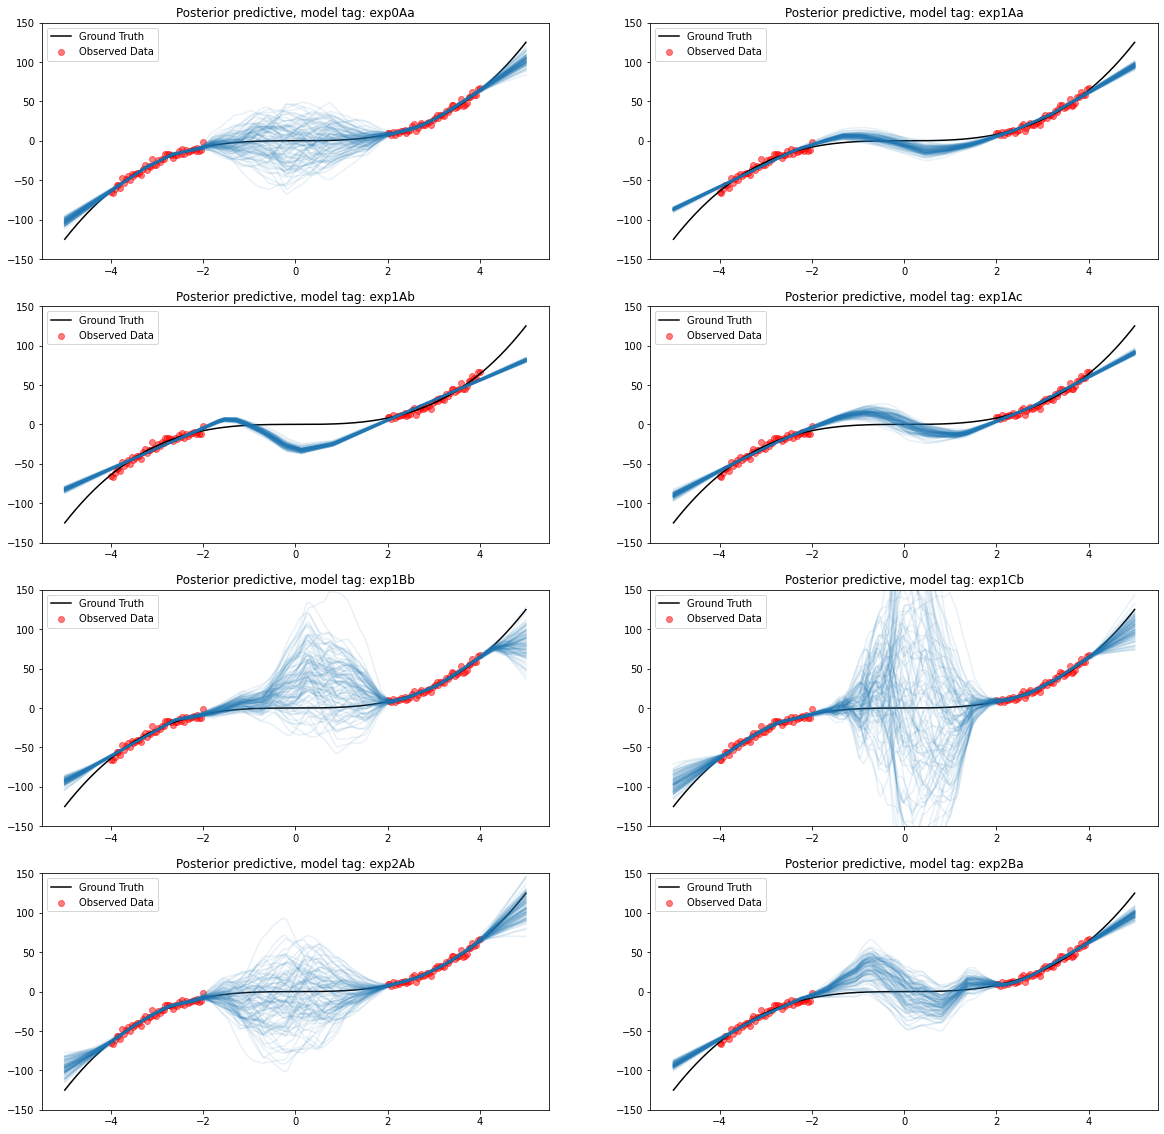

In [6]:
y_posterior_series1 = []

fig1_1, ax1_1 = plt.subplots(4, 2, figsize = (20, 20))

for i, nn in enumerate(NN_series1):
    y_posterior_series1.append(nn.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var))

ax1_1[0][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[0][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[0][0].plot(x_test[0,:], y_posterior_series1[0].T, color='tab:blue', alpha=0.1)
ax1_1[0][0].set_ylim([-150, 150])
ax1_1[0][0].set_title('Posterior predictive, model tag: ' + nn0_tag)
ax1_1[0][0].legend()

ax1_1[0][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[0][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[0][1].plot(x_test[0,:], y_posterior_series1[1].T, color='tab:blue', alpha=0.1)
ax1_1[0][1].set_ylim([-150, 150])
ax1_1[0][1].set_title('Posterior predictive, model tag: ' + nn1_tag)
ax1_1[0][1].legend()

ax1_1[1][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[1][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[1][0].plot(x_test[0,:], y_posterior_series1[2].T, color='tab:blue', alpha=0.1)
ax1_1[1][0].set_ylim([-150, 150])
ax1_1[1][0].set_title('Posterior predictive, model tag: ' + nn2_tag)
ax1_1[1][0].legend()

ax1_1[1][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[1][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[1][1].plot(x_test[0,:], y_posterior_series1[3].T, color='tab:blue', alpha=0.1)
ax1_1[1][1].set_ylim([-150, 150])
ax1_1[1][1].set_title('Posterior predictive, model tag: ' + nn3_tag)
ax1_1[1][1].legend()

ax1_1[2][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[2][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[2][0].plot(x_test[0,:], y_posterior_series1[4].T, color='tab:blue', alpha=0.1)
ax1_1[2][0].set_ylim([-150, 150])
ax1_1[2][0].set_title('Posterior predictive, model tag: ' + nn4_tag)
ax1_1[2][0].legend()

ax1_1[2][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[2][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[2][1].plot(x_test[0,:], y_posterior_series1[5].T, color='tab:blue', alpha=0.1)
ax1_1[2][1].set_ylim([-150, 150])
ax1_1[2][1].set_title('Posterior predictive, model tag: ' + nn5_tag)
ax1_1[2][1].legend()

ax1_1[3][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[3][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[3][0].plot(x_test[0,:], y_posterior_series1[6].T, color='tab:blue', alpha=0.1)
ax1_1[3][0].set_ylim([-150, 150])
ax1_1[3][0].set_title('Posterior predictive, model tag: ' + nn6_tag)
ax1_1[3][0].legend()

ax1_1[3][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_1[3][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_1[3][1].plot(x_test[0,:], y_posterior_series1[7].T, color='tab:blue', alpha=0.1)
ax1_1[3][1].set_ylim([-150, 150])
ax1_1[3][1].set_title('Posterior predictive, model tag: ' + nn7_tag)
ax1_1[3][1].legend()



/Users/Arthur/opt/anaconda3/lib/python3.8/site-packages/autograd/tracer.py:48: RuntimeWarning: covariance is not positive-semidefinite.
  return f_raw(*args, **kwargs)


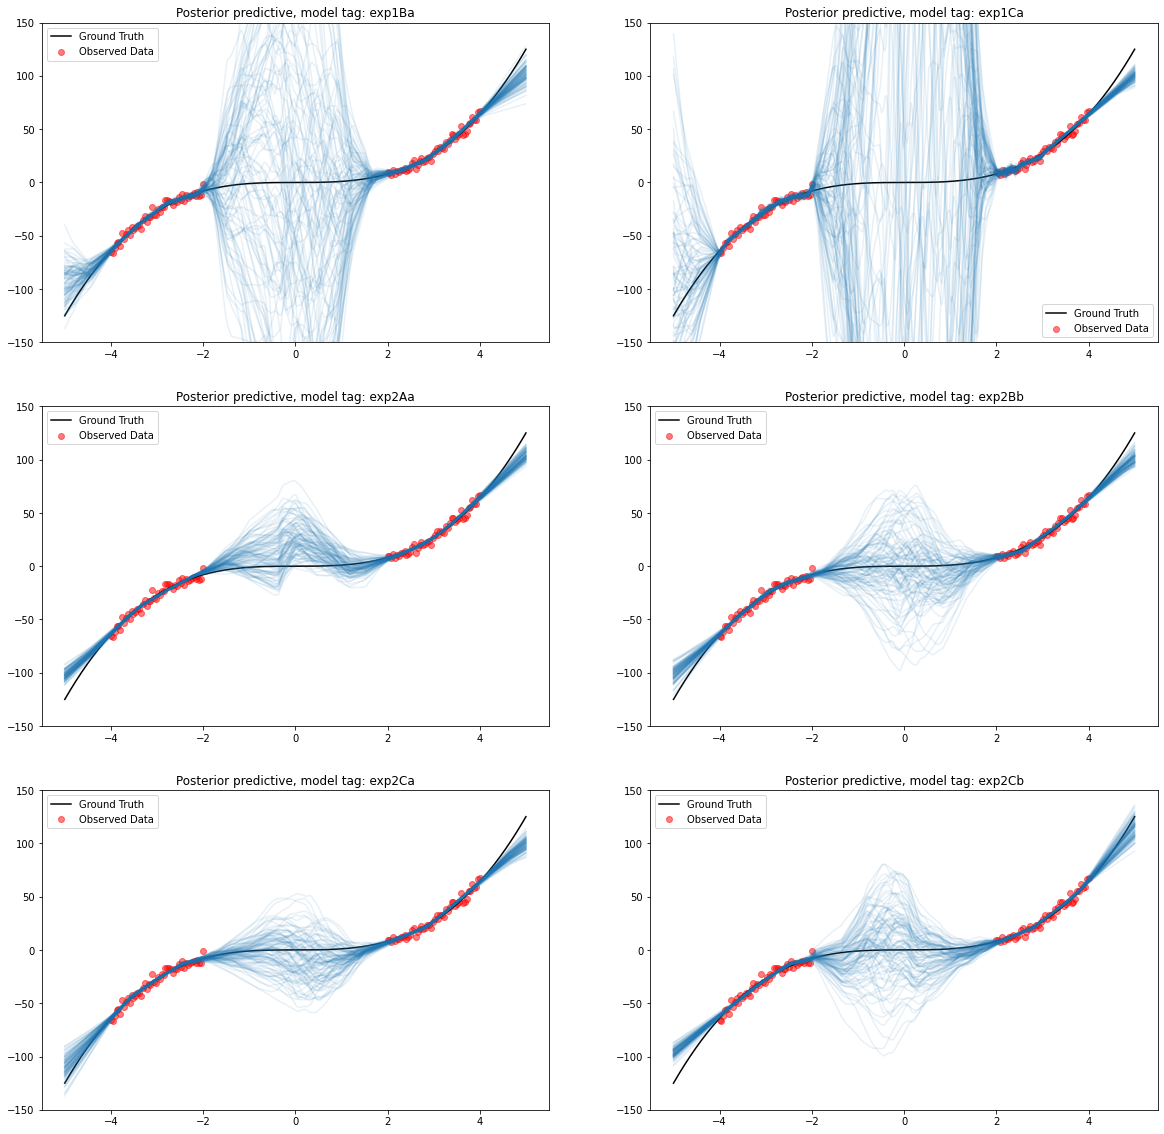

In [7]:
y_posterior_series2 = []

fig1_2, ax1_2 = plt.subplots(3, 2, figsize = (20, 20))

for i, nn in enumerate(NN_series2):
    y_posterior_series2.append(nn.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var))

ax1_2[0][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_2[0][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_2[0][0].plot(x_test[0,:], y_posterior_series2[0].T, color='tab:blue', alpha=0.1)
ax1_2[0][0].set_ylim([-150, 150])
ax1_2[0][0].set_title('Posterior predictive, model tag: ' + nn8_tag)
ax1_2[0][0].legend()

ax1_2[0][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_2[0][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_2[0][1].plot(x_test[0,:], y_posterior_series2[1].T, color='tab:blue', alpha=0.1)
ax1_2[0][1].set_ylim([-150, 150])
ax1_2[0][1].set_title('Posterior predictive, model tag: ' + nn9_tag)
ax1_2[0][1].legend()

ax1_2[1][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_2[1][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_2[1][0].plot(x_test[0,:], y_posterior_series2[2].T, color='tab:blue', alpha=0.1)
ax1_2[1][0].set_ylim([-150, 150])
ax1_2[1][0].set_title('Posterior predictive, model tag: ' + nn10_tag)
ax1_2[1][0].legend()

ax1_2[1][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_2[1][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_2[1][1].plot(x_test[0,:], y_posterior_series2[3].T, color='tab:blue', alpha=0.1)
ax1_2[1][1].set_ylim([-150, 150])
ax1_2[1][1].set_title('Posterior predictive, model tag: ' + nn11_tag)
ax1_2[1][1].legend()

ax1_2[2][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_2[2][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_2[2][0].plot(x_test[0,:], y_posterior_series2[4].T, color='tab:blue', alpha=0.1)
ax1_2[2][0].set_ylim([-150, 150])
ax1_2[2][0].set_title('Posterior predictive, model tag: ' + nn12_tag)
ax1_2[2][0].legend()

ax1_2[2][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_2[2][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_2[2][1].plot(x_test[0,:], y_posterior_series2[5].T, color='tab:blue', alpha=0.1)
ax1_2[2][1].set_ylim([-150, 150])
ax1_2[2][1].set_title('Posterior predictive, model tag: ' + nn13_tag)
ax1_2[2][1].legend()

/Users/Arthur/opt/anaconda3/lib/python3.8/site-packages/autograd/tracer.py:48: RuntimeWarning: covariance is not positive-semidefinite.
  return f_raw(*args, **kwargs)


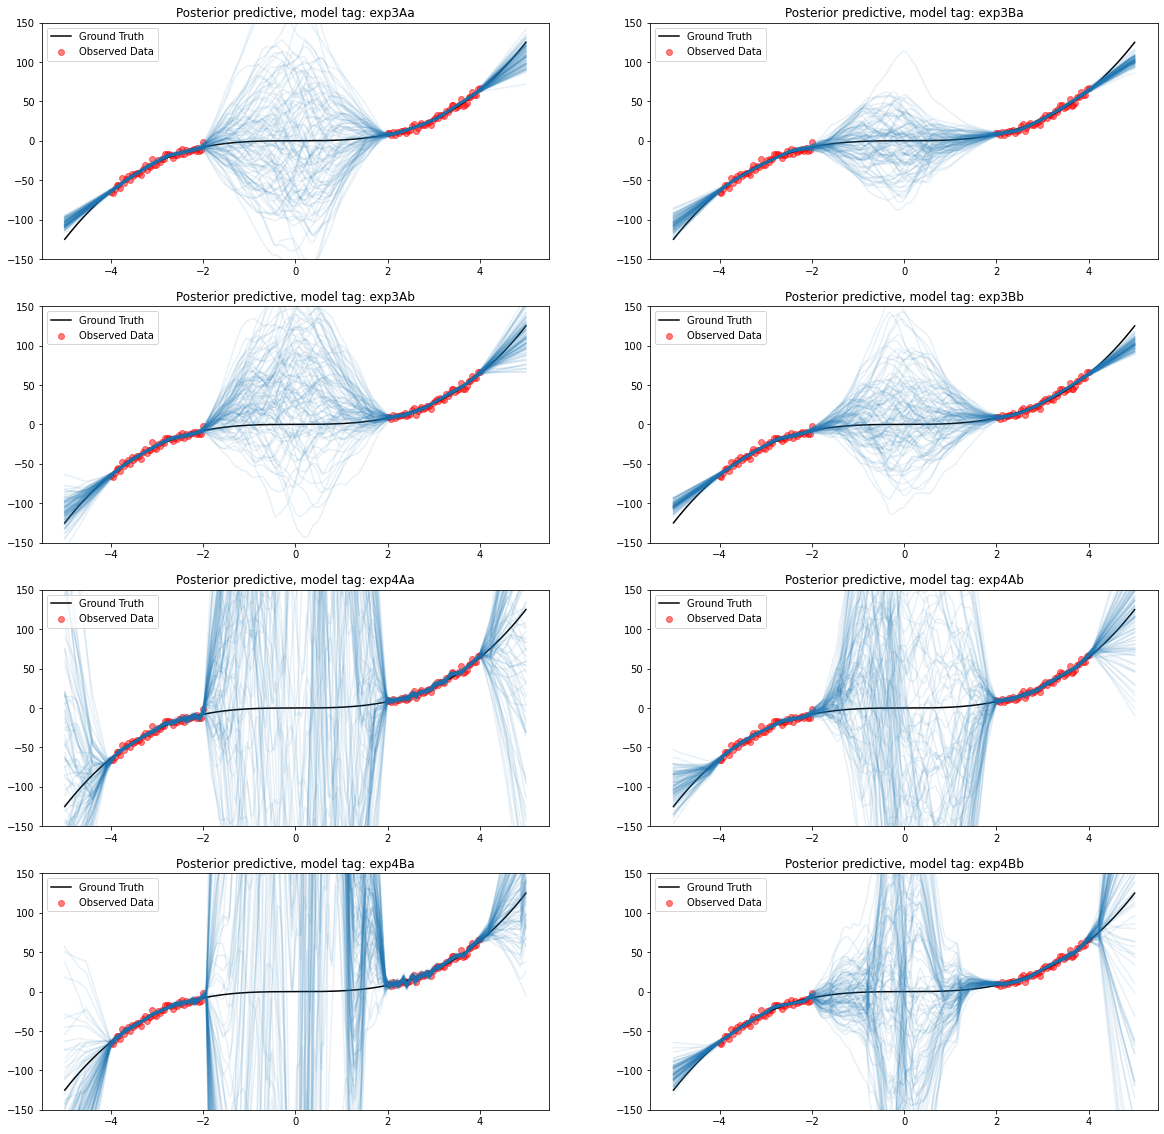

In [8]:
y_posterior_series3 = []

fig1_3, ax1_3 = plt.subplots(4, 2, figsize = (20, 20))

for i, nn in enumerate(NN_series3):
    y_posterior_series3.append(nn.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var))

ax1_3[0][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[0][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[0][0].plot(x_test[0,:], y_posterior_series3[0].T, color='tab:blue', alpha=0.1)
ax1_3[0][0].set_ylim([-150, 150])
ax1_3[0][0].set_title('Posterior predictive, model tag: ' + nn14_tag)
ax1_3[0][0].legend()

ax1_3[0][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[0][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[0][1].plot(x_test[0,:], y_posterior_series3[1].T, color='tab:blue', alpha=0.1)
ax1_3[0][1].set_ylim([-150, 150])
ax1_3[0][1].set_title('Posterior predictive, model tag: ' + nn15_tag)
ax1_3[0][1].legend()

ax1_3[1][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[1][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[1][0].plot(x_test[0,:], y_posterior_series3[2].T, color='tab:blue', alpha=0.1)
ax1_3[1][0].set_ylim([-150, 150])
ax1_3[1][0].set_title('Posterior predictive, model tag: ' + nn16_tag)
ax1_3[1][0].legend()

ax1_3[1][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[1][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[1][1].plot(x_test[0,:], y_posterior_series3[3].T, color='tab:blue', alpha=0.1)
ax1_3[1][1].set_ylim([-150, 150])
ax1_3[1][1].set_title('Posterior predictive, model tag: ' + nn17_tag)
ax1_3[1][1].legend()

ax1_3[2][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[2][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[2][0].plot(x_test[0,:], y_posterior_series3[4].T, color='tab:blue', alpha=0.1)
ax1_3[2][0].set_ylim([-150, 150])
ax1_3[2][0].set_title('Posterior predictive, model tag: ' + nn18_tag)
ax1_3[2][0].legend()

ax1_3[2][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[2][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[2][1].plot(x_test[0,:], y_posterior_series3[5].T, color='tab:blue', alpha=0.1)
ax1_3[2][1].set_ylim([-150, 150])
ax1_3[2][1].set_title('Posterior predictive, model tag: ' + nn19_tag)
ax1_3[2][1].legend()

ax1_3[3][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[3][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[3][0].plot(x_test[0,:], y_posterior_series3[6].T, color='tab:blue', alpha=0.1)
ax1_3[3][0].set_ylim([-150, 150])
ax1_3[3][0].set_title('Posterior predictive, model tag: ' + nn20_tag)
ax1_3[3][0].legend()

ax1_3[3][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_3[3][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_3[3][1].plot(x_test[0,:], y_posterior_series3[7].T, color='tab:blue', alpha=0.1)
ax1_3[3][1].set_ylim([-150, 150])
ax1_3[3][1].set_title('Posterior predictive, model tag: ' + nn21_tag)
ax1_3[3][1].legend()

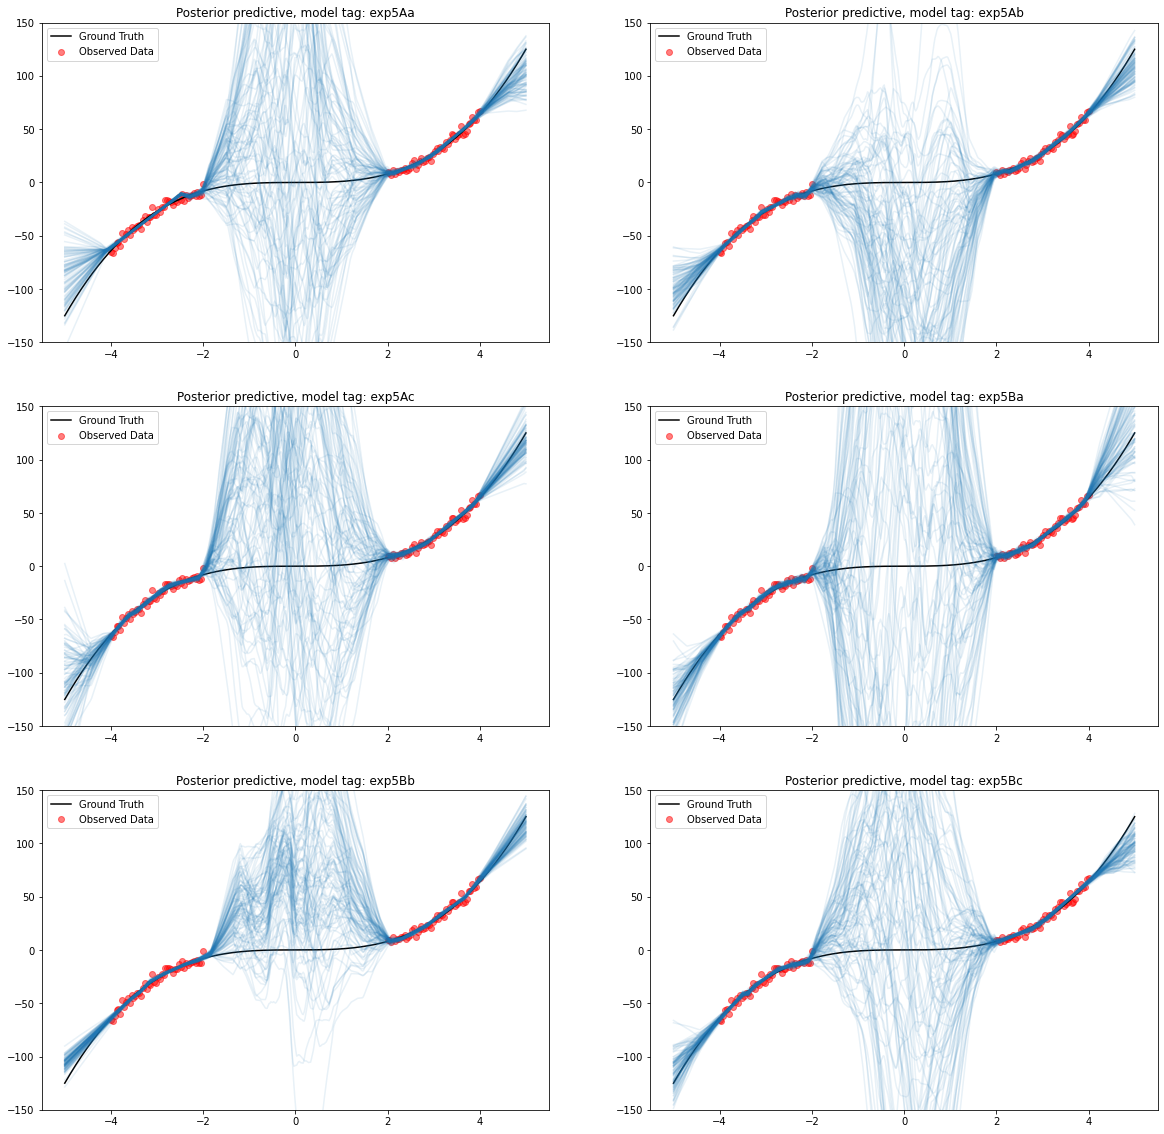

In [9]:
y_posterior_series4 = []

fig1_4, ax1_4 = plt.subplots(3, 2, figsize = (20, 20))

for i, nn in enumerate(NN_series4):
    y_posterior_series4.append(nn.get_posterior_preds(x_test, x_obs=x, y_obs=y, w_prior_cov=prior_var, noise_var=noise_var))

ax1_4[0][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_4[0][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_4[0][0].plot(x_test[0,:], y_posterior_series4[0].T, color='tab:blue', alpha=0.1)
ax1_4[0][0].set_ylim([-150, 150])
ax1_4[0][0].set_title('Posterior predictive, model tag: ' + nn22_tag)
ax1_4[0][0].legend()

ax1_4[0][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_4[0][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_4[0][1].plot(x_test[0,:], y_posterior_series4[1].T, color='tab:blue', alpha=0.1)
ax1_4[0][1].set_ylim([-150, 150])
ax1_4[0][1].set_title('Posterior predictive, model tag: ' + nn23_tag)
ax1_4[0][1].legend()

ax1_4[1][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_4[1][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_4[1][0].plot(x_test[0,:], y_posterior_series4[2].T, color='tab:blue', alpha=0.1)
ax1_4[1][0].set_ylim([-150, 150])
ax1_4[1][0].set_title('Posterior predictive, model tag: ' + nn24_tag)
ax1_4[1][0].legend()

ax1_4[1][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_4[1][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_4[1][1].plot(x_test[0,:], y_posterior_series4[3].T, color='tab:blue', alpha=0.1)
ax1_4[1][1].set_ylim([-150, 150])
ax1_4[1][1].set_title('Posterior predictive, model tag: ' + nn25_tag)
ax1_4[1][1].legend()

ax1_4[2][0].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_4[2][0].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_4[2][0].plot(x_test[0,:], y_posterior_series4[4].T, color='tab:blue', alpha=0.1)
ax1_4[2][0].set_ylim([-150, 150])
ax1_4[2][0].set_title('Posterior predictive, model tag: ' + nn26_tag)
ax1_4[2][0].legend()

ax1_4[2][1].scatter(x[0,:], y[0,:], color='red', alpha=0.5, label='Observed Data')
ax1_4[2][1].plot(x_test[0,:], x_test[0,:]**3, color='black', label="Ground Truth")
ax1_4[2][1].plot(x_test[0,:], y_posterior_series4[5].T, color='tab:blue', alpha=0.1)
ax1_4[2][1].set_ylim([-150, 150])
ax1_4[2][1].set_title('Posterior predictive, model tag: ' + nn27_tag)
ax1_4[2][1].legend()